# **Diabetes Prediction**
----------------------------------------------------

#### **Data Understanding**

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import learning_curve
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [51]:
Healthcare_data = pd.read_csv('Healthcare-Diabetes.csv')
df = pd.read_csv("Healthcare-Diabetes.csv")
Healthcare_data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [52]:
df.shape

(2768, 10)

In [53]:
df = df.drop(columns=["Id"], errors="ignore")

In [54]:
print(df.isnull().sum())
invalid_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in invalid_cols:
    print(f"{col} - Zeros: {(df[col] == 0).sum()}")

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Glucose - Zeros: 18
BloodPressure - Zeros: 125
SkinThickness - Zeros: 800
Insulin - Zeros: 1330
BMI - Zeros: 39


In [63]:
df = df.drop(columns=["Id"], errors="ignore")

In [64]:
print("\nUpdated Shape After Cleaning:", df.shape)


Updated Shape After Cleaning: (2356, 9)


#### **Data Cleaning**

In [65]:
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [66]:
df[invalid_cols] = df[invalid_cols].fillna(df[invalid_cols].mean())
df[invalid_cols] = df[invalid_cols].fillna(df[invalid_cols].median())
print(df.dtypes)

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [67]:
df = df[df["Pregnancies"] > 0]
print(df.shape)
print(df["Pregnancies"].describe())

(2356, 9)
count    2356.000000
mean        4.397284
std         3.178226
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        17.000000
Name: Pregnancies, dtype: float64


In [68]:
df.columns = [col.capitalize() for col in df.columns]
df = df.drop(columns=["Id"], errors="ignore")
cols_with_zeros = ["Glucose", "Bloodpressure", "Skinthickness", "Insulin", "Bmi"]
df[cols_with_zeros] = df[cols_with_zeros].replace(0, pd.NA)
df[cols_with_zeros] = df[cols_with_zeros].fillna(df[cols_with_zeros].mean())

In [69]:
object_cols = df.select_dtypes(include='object').columns
print("Object columns:", object_cols)

Object columns: Index([], dtype='object')


In [70]:
df["Glucose"] = pd.to_numeric(df["Glucose"], errors="coerce")

In [71]:
print("\nUpdated Shape After Cleaning:", df.shape)


Updated Shape After Cleaning: (2356, 9)


In [72]:
from sklearn.preprocessing import StandardScaler

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [73]:
invalid_cols = ["Glucose", "Bloodpressure", "Skinthickness", "Insulin", "Bmi"]
df[invalid_cols] = df[invalid_cols].replace(0, pd.NA)
df.isna().sum()

,0
Pregnancies,0
Glucose,0
Bloodpressure,0
Skinthickness,0
Insulin,0
Bmi,0
Diabetespedigreefunction,0
Age,0
Outcome,0


In [74]:
df["Outcome"].value_counts(normalize=True)

,proportion
Outcome,
0,0.654499
1,0.345501


#### **Data Visualization**

Histogram

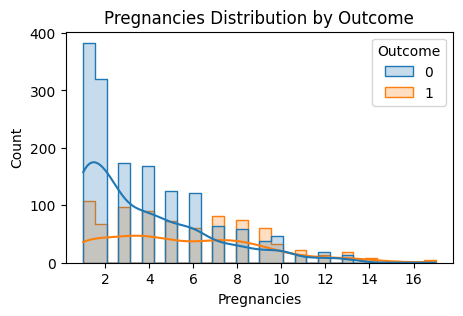

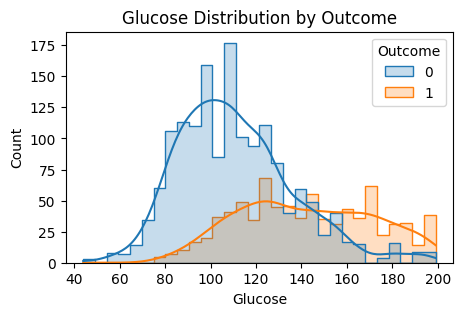

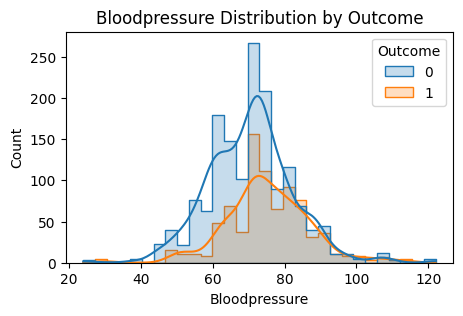

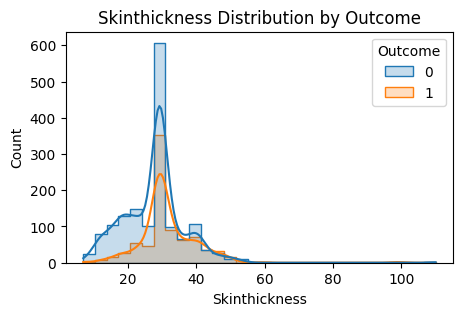

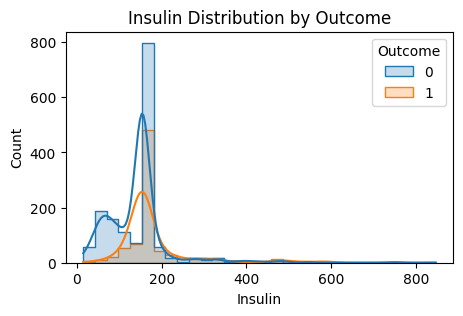

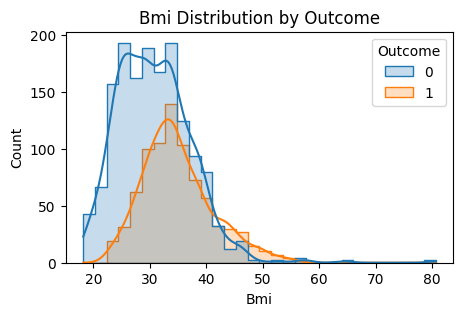

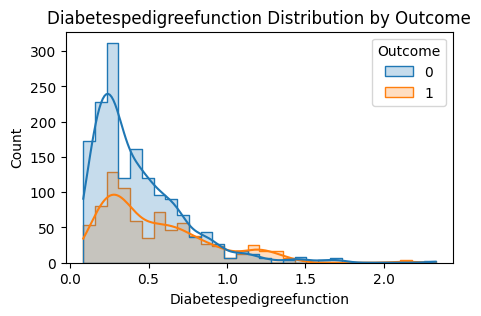

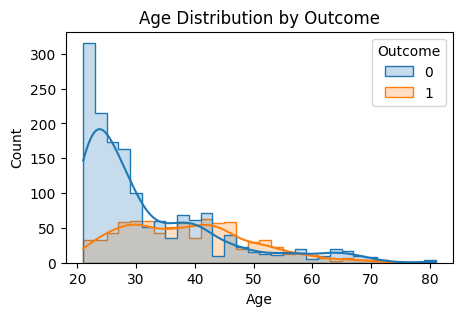

In [75]:
features = df.columns.drop("Outcome")
for feature in features:
    plt.figure(figsize=(5,3))
    sns.histplot(data=df, x=feature, hue="Outcome", kde=True, element="step", bins=30)
    plt.title(f"{feature} Distribution by Outcome")
    plt.show()

Heatmap

In [76]:
corr_preg = df["Pregnancies"].corr(df["Outcome"])
print(f"Correlation between Pregnancies and Outcome: {corr_preg:.4f}")

Correlation between Pregnancies and Outcome: 0.2701


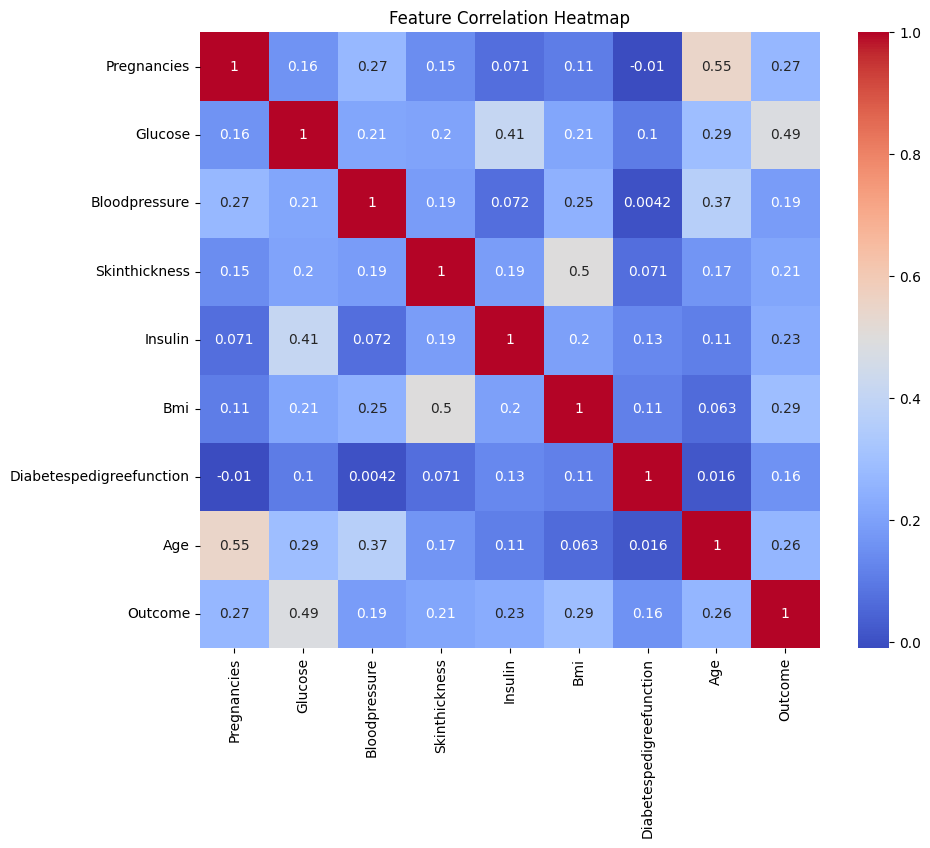

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

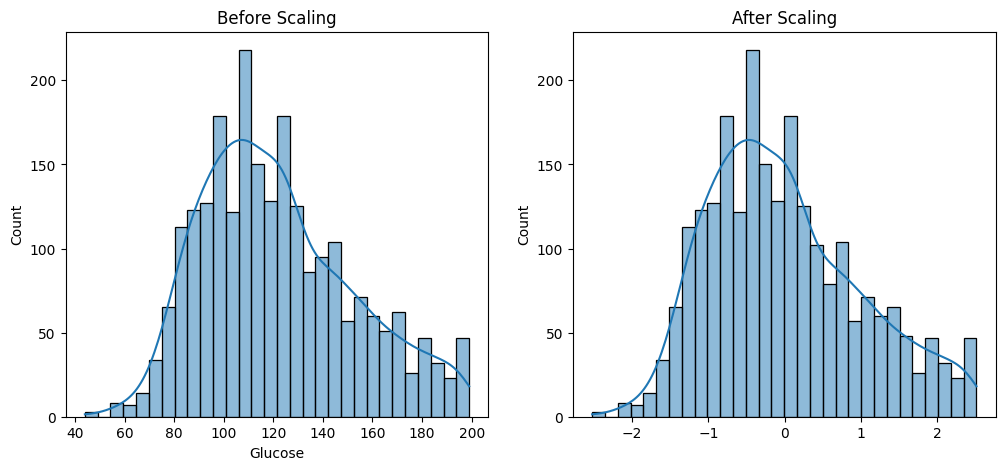

In [78]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["Glucose"], bins=30, kde=True)
plt.title("Before Scaling")

plt.subplot(1, 2, 2)
sns.histplot(X_scaled[:, df.columns.get_loc("Glucose")], bins=30, kde=True)
plt.title("After Scaling")

plt.show()

#### **Data Training**

Logistical Regression

In [79]:
df.columns = [col.capitalize() for col in df.columns]
df = df.drop(columns=["Id"], errors="ignore")
df = df[df["Pregnancies"] > 0]
replace_cols = ["Glucose", "Bloodpressure", "Skinthickness", "Insulin", "Bmi"]
df[replace_cols] = df[replace_cols].replace(0, pd.NA)
df[replace_cols] = df[replace_cols].fillna(df[replace_cols].mean())
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [80]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [81]:
y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_val_pred)
auc = roc_auc_score(y_val, y_val_proba)

print(f"Validation Accuracy: {accuracy:.3f}")
print(f"Validation AUC: {auc:.3f}")
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.777
Validation AUC: 0.843

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       308
           1       0.73      0.57      0.64       163

    accuracy                           0.78       471
   macro avg       0.76      0.73      0.74       471
weighted avg       0.77      0.78      0.77       471



### **Score for Kaggle**

Validation Accuracy: ~0.77

Validation AUC: ~0.84

KNN

In [82]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

Accuracy: 0.8199152542372882
AUC: 0.8991700915281832
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       309
           1       0.74      0.73      0.74       163

    accuracy                           0.82       472
   macro avg       0.80      0.80      0.80       472
weighted avg       0.82      0.82      0.82       472



### **Score for Kaggle**

Validation Accuracy: ~0.82

Validation AUC: ~0.90

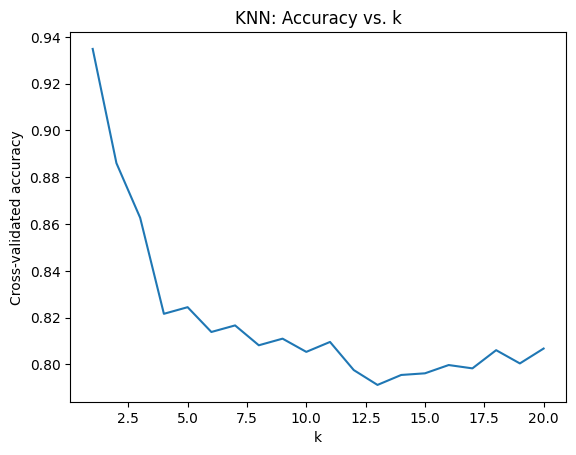

In [83]:
k_range = range(1, 21)
scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5).mean()
          for k in k_range]

plt.plot(k_range, scores)
plt.xlabel("k")
plt.ylabel("Cross-validated accuracy")
plt.title("KNN: Accuracy vs. k")
plt.show()